Loading Data and converting 'Total Assets' and 'Liabilities'

In [2]:
import pandas as pd
import numpy as np

trainData = pd.read_csv("./train.csv", header=0)
testData = pd.read_csv("./test.csv", header=0)

def convert_column_custom(val):
    parts = val.split()
    amount_value = float(parts[0])
    unit_type = parts[-1]

    conversion_factors = {
        'Crore+': 10000000,
        'Lac+': 100000,
        'Thou+': 1000,
        'Hund+': 100,
        '0': 0,
    }

    factor = conversion_factors.get(unit_type, None)
    return amount_value * factor


trainData['Total Assets'] = trainData['Total Assets'].apply(convert_column_custom)
testData['Total Assets'] = testData['Total Assets'].apply(convert_column_custom)

trainData['Liabilities'] = trainData['Liabilities'].apply(convert_column_custom)
testData['Liabilities'] = testData['Liabilities'].apply(convert_column_custom)

In [ ]:
Data Vizualisation, plotting graphs to show their dependencies

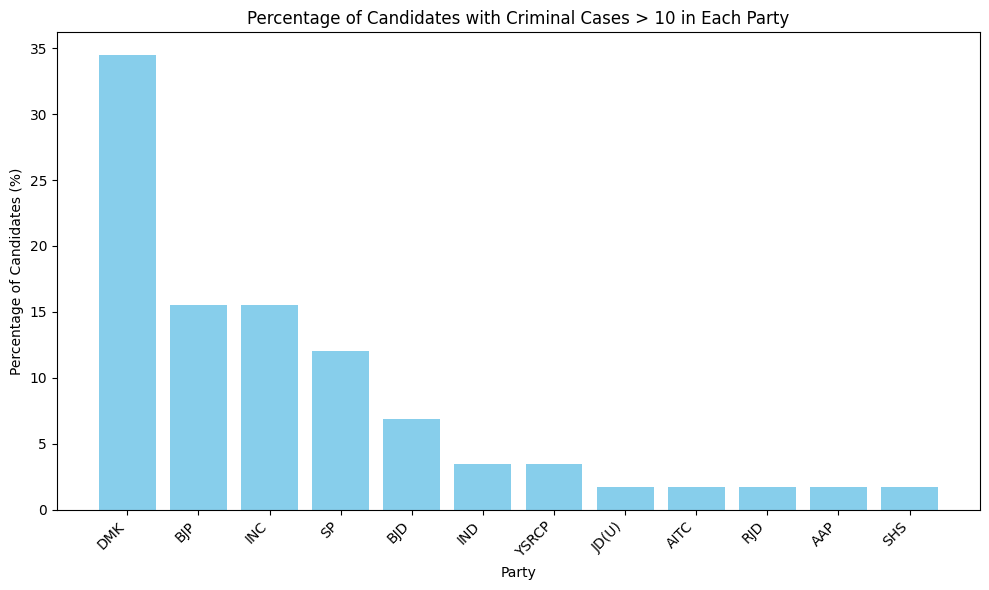

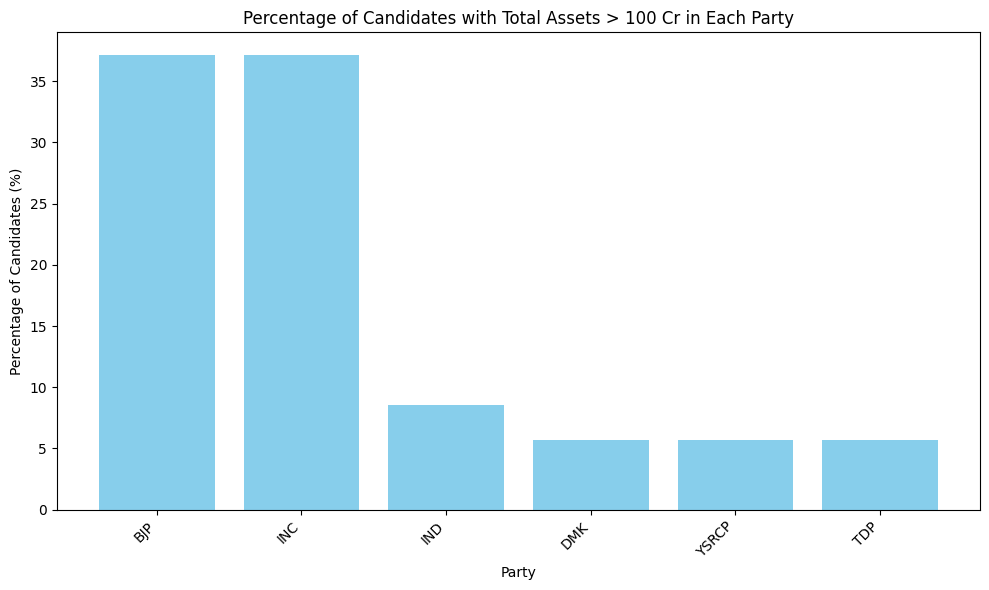

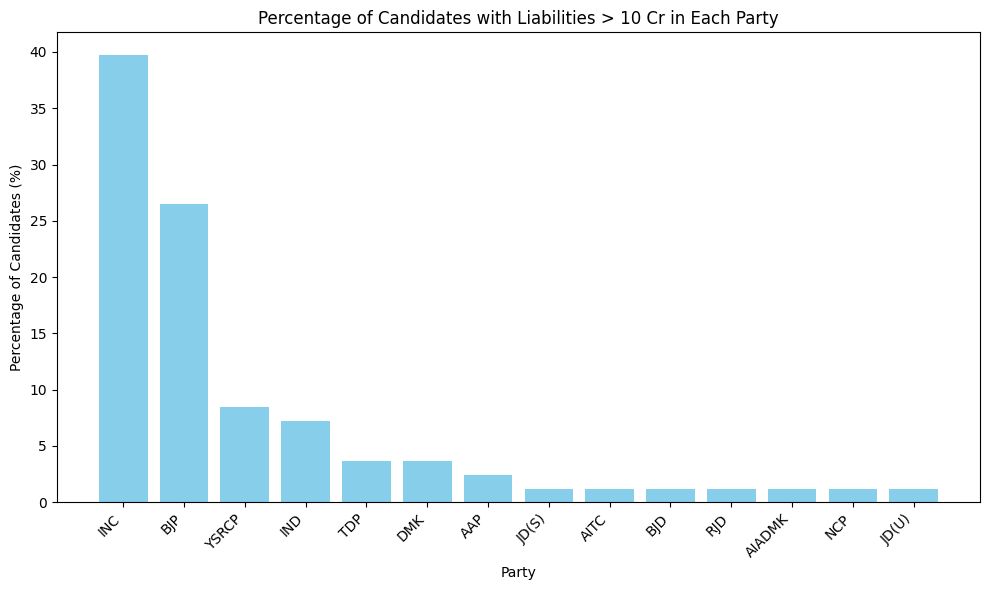

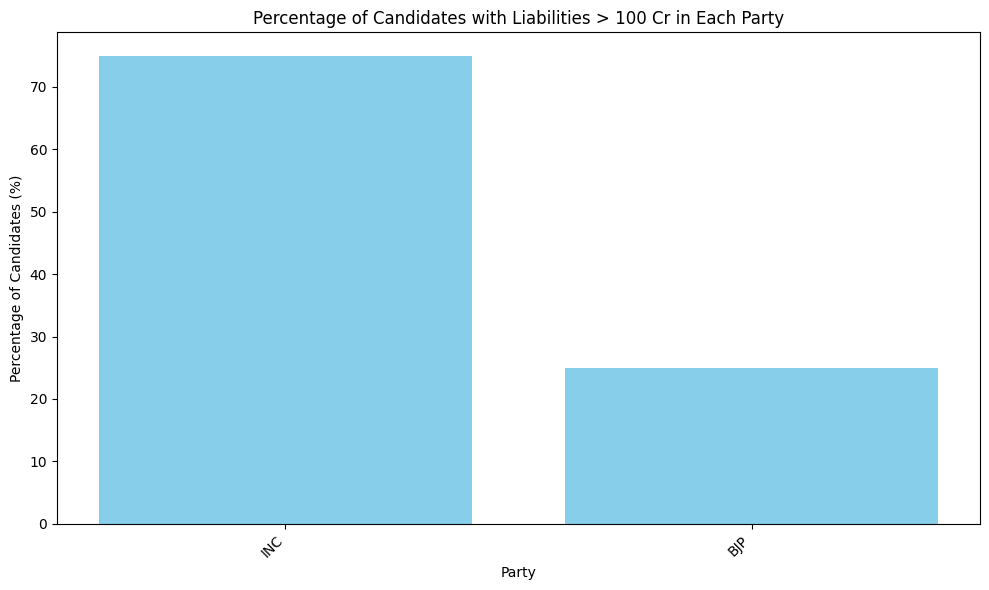

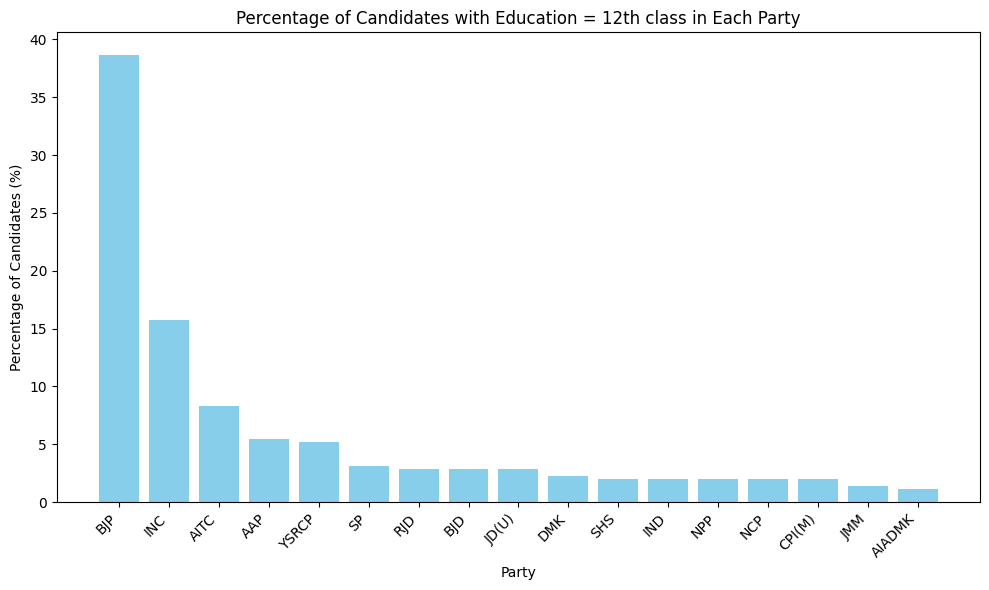

In [4]:
import matplotlib.pyplot as plt

count = trainData[trainData['Criminal Case'] > 10]['Party'].value_counts()

total_cases = count.sum()
party_percentages = (count / total_cases) * 100

#criminal cases
plt.figure(figsize=(10, 6))
plt.bar(party_percentages.index, party_percentages.values, color='skyblue')
plt.xlabel('Party')
plt.ylabel('Percentage of Candidates (%)')
plt.title('Percentage of Candidates with Criminal Cases > 10 in Each Party')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


count = trainData[trainData['Total Assets'] > 1000000000]['Party'].value_counts()

total_cases = count.sum()
party_percentages = (count / total_cases) * 100

#assets
plt.figure(figsize=(10, 6))
plt.bar(party_percentages.index, party_percentages.values, color='skyblue')
plt.xlabel('Party')
plt.ylabel('Percentage of Candidates (%)')
plt.title('Percentage of Candidates with Total Assets > 100 Cr in Each Party')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


count = trainData[trainData['Liabilities'] > 100000000]['Party'].value_counts()

total_cases = count.sum()
party_percentages = (count / total_cases) * 100

#Liabilities
plt.figure(figsize=(10, 6))
plt.bar(party_percentages.index, party_percentages.values, color='skyblue')
plt.xlabel('Party')
plt.ylabel('Percentage of Candidates (%)')
plt.title('Percentage of Candidates with Liabilities > 10 Cr in Each Party')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

count = trainData[trainData['Liabilities'] > 1000000000]['Party'].value_counts()

total_cases = count.sum()
party_percentages = (count / total_cases) * 100

#Liabilities
plt.figure(figsize=(10, 6))
plt.bar(party_percentages.index, party_percentages.values, color='skyblue')
plt.xlabel('Party')
plt.ylabel('Percentage of Candidates (%)')
plt.title('Percentage of Candidates with Liabilities > 100 Cr in Each Party')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

count = trainData[trainData['Education'] == '12th Pass']['Party'].value_counts()

total_cases = count.sum()
party_percentages = (count / total_cases) * 100

#Education
plt.figure(figsize=(10, 6))
plt.bar(party_percentages.index, party_percentages.values, color='skyblue')
plt.xlabel('Party')
plt.ylabel('Percentage of Candidates (%)')
plt.title('Percentage of Candidates with Education = 12th class in Each Party')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [5]:
max_asset_value = trainData['Total Assets'].max()
max_asset_value2 = testData['Total Assets'].max()

max_liabilities = trainData['Liabilities'].max()

trainData['Total Assets'] = trainData['Total Assets'] / max_asset_value
testData['Total Assets'] = testData['Total Assets'] / max_asset_value

trainData['Liabilities'] = trainData['Liabilities'] / max_liabilities
testData['Liabilities'] = testData['Liabilities'] / max_liabilities

Definining maps of party, state, Education

In [6]:
party_mapper = {
    'DMK': 1,
    'BJP': 2,
    'INC': 3,
    'AITC': 4,
    'AAP': 5,
    'SP': 6,
    'NPP': 7,
    'BJD': 8,
    'IND': 9,
    'SHS': 10,
    'RJD': 11,
    'YSRCP': 12,
    'AIADMK': 13,
    'CPI(M)': 14,
    'NCP': 15,
    'TDP': 16,
    'NDPP': 17,
    'CPI': 18,
    'Sikkim Krantikari Morcha': 19,
    'JD(U)': 20,
    'JMM': 21,
    'JD(S)': 22,
    'Tipra Motha Party': 23
}


state_mapper = {
    'TAMIL NADU': 1,
    'MADHYA PRADESH': 2,
    'KARNATAKA': 3,
    'BIHAR': 4,
    'WEST BENGAL': 5,
    'UTTAR PRADESH': 6,
    'PUNJAB': 7,
    'MAHARASHTRA': 8,
    'ODISHA': 9,
    'HIMACHAL PRADESH': 10,
    'MEGHALAYA': 11,
    'KERALA': 12,
    'HARYANA': 13,
    'DELHI': 14,
    'ANDHRA PRADESH': 15,
    'MANIPUR': 16,
    'RAJASTHAN': 17,
    'ASSAM': 18,
    'ARUNACHAL PRADESH': 19,
    'JHARKHAND': 20,
    'GUJARAT': 21,
    'TRIPURA': 22,
    'CHHATTISGARH': 23,
    'UTTARAKHAND': 24,
    'NAGALAND': 25,
    'SIKKIM': 26,
    'GOA': 27,
    'PUDUCHERRY': 28
}

edu_mapper = {
    '8th Pass': 1,
    '12th Pass': 2,
    'Post Graduate': 3,
    'Graduate Professional': 4,
    'Graduate': 5,
    '10th Pass': 6,
    'Others': 7,
    'Doctorate': 8,
    'Literate': 9,
    '5th Pass': 10
}

rev_edu_mapper = {
    1: '8th Pass',
    2: '12th Pass',
    3: 'Post Graduate',
    4: 'Graduate Professional',
    5: 'Graduate',
    6: '10th Pass',
    7: 'Others',
    8: 'Doctorate',
    9: 'Literate',
    10: '5th Pass'
}


trainData['state'] = trainData['state'].map(state_mapper)
trainData['Party'] = trainData['Party'].map(party_mapper)
testData['state'] = testData['state'].map(state_mapper)
testData['Party'] = testData['Party'].map(party_mapper)
trainData['Education'] = trainData['Education'].map(edu_mapper)

SVC (standard vector machine)

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


X = trainData.iloc[:, 3:-1].values
y = trainData.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the SVM classifier
classifier = SVC(kernel='rbf', C=10, gamma=0.1, random_state=30)  # Adjust hyperparameters as needed
classifier.fit(X_train, y_train)

# Predict on test set
y_pred = classifier.predict(X_test)

reverse_edu_mapper = {v: k for k, v in edu_mapper.items()}
y_test = np.vectorize(reverse_edu_mapper.get)(y_test)
y_pred = np.vectorize(reverse_edu_mapper.get)(y_pred)



printing f1_score

In [12]:
from sklearn.metrics import f1_score

f1_score(y_pred,y_test, average = 'micro')

0.26019417475728157

final submission

In [10]:
submissionData = pd.DataFrame({"ID": testData["ID"].values})

features = ['Party', 'Criminal Case', 'Total Assets', 'Liabilities', 'state']
y_final = classifier.predict(testData[features])


submissionData["Education"] = y_final
submissionData["Education"] = submissionData["Education"].map(rev_edu_mapper)

submissionData.to_csv("Kaggle.csv", index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
